# ⌛️ FIERLENIUS 🦙

✍ Authors:

**ROUAUD Lucas**

Master 2 Bio-informatics at *Univerité de Paris*

[![Python 3.10.8](https://img.shields.io/badge/python-%E2%89%A5_3.10.8-blue.svg)](https://www.python.org/downloads/release/python-397/)
[![Conda 22.11.1](https://img.shields.io/badge/miniconda-%E2%89%A5_22.11.1-green.svg)](https://docs.conda.io/en/latest/miniconda.html)
[![GitHub last commit](https://img.shields.io/github/last-commit/FilouPlains/FIERLENIUS.svg)](https://github.com/FilouPlains/FIERLENIUS)
![GitHub stars](https://img.shields.io/github/stars/FilouPlains/FIERLENIUS.svg?style=social)

<nav>
    <ul>
        <li><a href="../index.html">../index.html</a></li>
    </ul>
</nav>

<link rel="stylesheet" href="../style.css" />
<link rel="icon" type="image/x-icon" href="../jupyter_logo_icon.svg" />


In [1]:
# Import packages

# [M]
import matplotlib.pyplot as plot
# [N]
import numpy as np

# [M]
from matplotlib import colormaps, cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# [O]
from os import popen
# [S]
from scipy.stats import linregress, pearsonr
# [T]
from tqdm.notebook import tqdm


## DEFINING CONSTANTS

In [2]:
BLACKBLUE: str = "#2E2E3E"
LIGHTBLACKBLUE: str = "#626284"
OCREYELLOW: str = "#AA883E"
PT_TO_INCH: int = 72

print(f"{BLACKBLUE}")
print(f"{LIGHTBLACKBLUE}")
print(f"{OCREYELLOW}")


plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2,
    "boxplot.flierprops.color": BLACKBLUE,
    "boxplot.flierprops.markerfacecolor": BLACKBLUE + "44",
    "boxplot.flierprops.markeredgecolor": "None",
    "boxplot.boxprops.color": BLACKBLUE,
    "boxplot.whiskerprops.color": BLACKBLUE,
    "boxplot.capprops.color": BLACKBLUE,
    "boxplot.medianprops.linewidth": 2,
    "boxplot.medianprops.color": BLACKBLUE
})


#2E2E3E
#626284
#AA883E


## Vectors norm meaning without `--segment`

### Loading data

PARSING PATH:   0%|          | 0/4 [00:00<?, ?it/s]

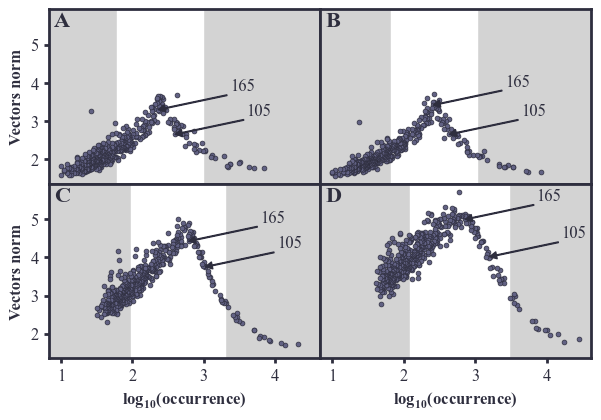

In [3]:
plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE

})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 300 / PT_TO_INCH),
)

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

INDEX_LETTER: list = [["A", "B"], ["C", "D"]]

for i in [0, 1]:
    for j in [0, 1]:
        to_plot[i, j].set_facecolor("#d3d3d3")

        for part in ["top", "bottom", "left", "right"]:
            to_plot[i, j].spines[part].set_linewidth(2)
            to_plot[i, j].spines[part].set_color(BLACKBLUE)

        plot.text(
            x=0.02,
            y=0.98,
            s=INDEX_LETTER[i][j],
            fontweight="bold",
            fontsize=16,
            ha="left",
            va="top",
            transform=to_plot[i, j].transAxes
        )

PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

PLOT_POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

for i, path_i in enumerate(tqdm(PATH, "PARSING PATH")):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i

    # Get data.
    data: object = np.load(
        popen(
            command + "embedding*.npy").readlines()[0].strip(),
        allow_pickle=True
    )
    characteristic: object = np.transpose(np.load(
        popen(command + "characteristics*.npy").readlines()[0].strip(),
        allow_pickle=True
    ))

    # Code Peitsch.
    peitsch: object = characteristic[0].astype("int64")
    # Representatives numbers.
    domain: object = characteristic[5].astype("int64")
    # Representatives numbers.
    ssr_code: object = np.array(characteristic[4])

    frequency: object = np.log10(domain)
    norm: object = np.linalg.norm(data, axis=1)

    filter: object = (peitsch != 147).astype(int) + \
        (ssr_code != "N").astype(int) == 2

    x_ref: float = frequency[norm == norm[filter].max()][0]

    to_plot[PLOT_POSITION[i]].axvspan(
        x_ref * 0.75,
        x_ref * 1.25,
        color="white"
    )

    to_plot[PLOT_POSITION[i]].scatter(
        x=frequency[ssr_code != "N"],
        y=norm[ssr_code != "N"],
        c=LIGHTBLACKBLUE,
        s=12,
        linewidth=0.5,
        edgecolor=BLACKBLUE
    )
    
    for p_i in [105, 165]:
        to_plot[PLOT_POSITION[i]].annotate(
            p_i,
            xy=(frequency[peitsch == p_i][0], norm[peitsch == p_i][0]),
            xytext=(frequency[peitsch == p_i][0] + 1,
                    norm[peitsch == p_i][0] + 0.5),
            arrowprops=dict(
                facecolor=BLACKBLUE,
                edgecolor=BLACKBLUE,
                width=0.5,
                headwidth=5,
                headlength=5
            )
        )

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i in [2, 3]:
        to_plot_i.set_xlabel(
            xlabel="log$\mathregular{_{10}}$(occurrence)",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i in [0, 2]:
        to_plot_i.set_ylabel(
            ylabel="Vectors norm",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

plot.savefig(
    "../../../data/output_plot/norm_vs_log10freq.pdf",
    bbox_inches="tight"
)


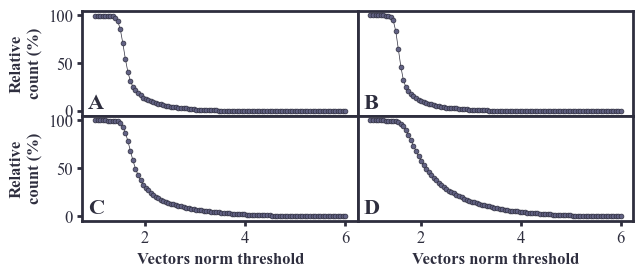

In [4]:
LEVEL: np.ndarray = np.linspace(1, 6, 100)

PT_TO_INCH: int = 72

PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

PLOT_POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

LETTER: list = [
    "A",
    "B",
    "C",
    "D"
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 200 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

norm_list: list = []

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i

    # Get data.
    data: object = np.load(
        popen(
            command + "embedding*.npy").readlines()[0].strip(),
        allow_pickle=True
    )

    norm_list += [np.linalg.norm(data, axis=1)]

data_list: list = [[], [], [], []]

for point in LEVEL:
    for i in range(len(data_list)):
        count: float = np.sum(norm_list[i] >= point) / \
            norm_list[i].shape[0] * 100

        data_list[i] += list([count])

for i, pos_i in enumerate(PLOT_POSITION):
    to_plot[pos_i].plot(
        LEVEL,
        data_list[i],
        color=BLACKBLUE,
        lw=0.5,
        zorder=1
        
    )

    to_plot[pos_i].scatter(
        x=LEVEL,
        y=data_list[i],
        c=LIGHTBLACKBLUE,
        s=12,
        linewidth=0.5,
        edgecolor=BLACKBLUE,
        zorder=2
    )

    to_plot[pos_i].text(
        x=0.02,
        y=0.02,
        s=LETTER[i],
        fontweight="bold",
        fontsize=16,
        ha="left",
        va="bottom",
        transform=to_plot[pos_i].transAxes
    )


for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i >= 2:
        to_plot_i.set_xlabel(
            xlabel="Vectors norm threshold",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i % 2 == 0:
        to_plot_i.set_ylabel(
            ylabel="Relative\ncount (%)",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

plot.savefig(
    "../../../data/output_plot/norm_relativecount_vs_treshold.pdf",
    bbox_inches="tight"
)


PARSING PATH:   0%|          | 0/4 [00:00<?, ?it/s]

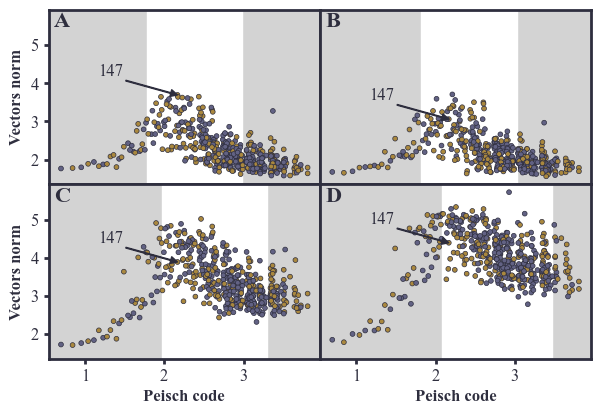

In [5]:
PT_TO_INCH: int = 72

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE

})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 300 / PT_TO_INCH),
)

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

INDEX_LETTER: list = [["A", "B"], ["C", "D"]]

for i in [0, 1]:
    for j in [0, 1]:
        to_plot[i, j].set_facecolor("#d3d3d3")

        for part in ["top", "bottom", "left", "right"]:
            to_plot[i, j].spines[part].set_linewidth(2)
            to_plot[i, j].spines[part].set_color(BLACKBLUE)

        plot.text(
            x=0.02,
            y=0.98,
            s=INDEX_LETTER[i][j],
            fontweight="bold",
            fontsize=16,
            ha="left",
            va="top",
            transform=to_plot[i, j].transAxes
        )

PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

PLOT_POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

for i, path_i in enumerate(tqdm(PATH, "PARSING PATH")):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i

    # Get data.
    data: object = np.load(
        popen(
            command + "embedding*.npy").readlines()[0].strip(),
        allow_pickle=True
    )
    characteristic: object = np.transpose(np.load(
        popen(command + "characteristics*.npy").readlines()[0].strip(),
        allow_pickle=True
    ))

    # Code Peitsch.
    peitsch: object = characteristic[0].astype("int64")
    log10_peitsch: object = np.log10(characteristic[0].astype("int64"))
    # Representatives numbers.
    domain: object = characteristic[5].astype("int64")
    # Representatives numbers.
    ssr_code: object = np.array(characteristic[4])

    frequency: object = np.log10(domain)
    norm: object = np.linalg.norm(data, axis=1)

    filter: object = (peitsch != 147).astype(int) + \
        (ssr_code != "N").astype(int) == 2

    x_ref: float = frequency[norm == norm[filter].max()][0]

    to_plot[PLOT_POSITION[i]].axvspan(
        x_ref * 0.75,
        x_ref * 1.25,
        color="white"
    )

    color_vector: list = [LIGHTBLACKBLUE] * frequency[ssr_code != "N"].shape[0]
    color_vector = np.array(color_vector)
    color_vector[np.isin(ssr_code, ["H", "E"])[ssr_code != "N"]] = OCREYELLOW

    to_plot[PLOT_POSITION[i]].scatter(
        x=log10_peitsch[ssr_code != "N"],
        y=norm[ssr_code != "N"],
        c=color_vector,
        s=12,
        linewidth=0.5,
        edgecolor=BLACKBLUE
    )

    to_plot[PLOT_POSITION[i]].annotate(
        "147",
        xy=(log10_peitsch[peitsch == 147][0], norm[peitsch == 147][0]),
        xytext=(log10_peitsch[peitsch == 147][0] - 1,
                norm[peitsch == 147][0] + 0.5),
        arrowprops=dict(
            facecolor=BLACKBLUE,
            edgecolor=BLACKBLUE,
            width=0.5,
            headwidth=5,
            headlength=5
        )
    )

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i in [2, 3]:
        to_plot_i.set_xlabel(
            xlabel="Peisch code",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i in [0, 2]:
        to_plot_i.set_ylabel(
            ylabel="Vectors norm",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

plot.savefig(
    "../../../data/output_plot/norm_vs_peitschcode.pdf",
    bbox_inches="tight"
)


PARSING PATH:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_21077/904197444.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  filter: np.ndarray = data[1:, 1:] != "100"
/tmp/ipykernel_21077/904197444.py:109: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  to_plot.scatter(
/tmp/ipykernel_21077/904197444.py:118: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  to_plot.scatter(


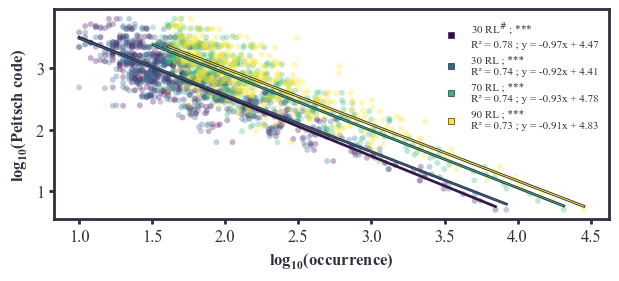

In [6]:
PT_TO_INCH: int = 72

PLOT_POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE

})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 200 / PT_TO_INCH),
)

grid = figure.add_gridspec(
    nrows=1,
    ncols=1,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

for part in ["top", "bottom", "left", "right"]:
    to_plot.spines[part].set_linewidth(2)
    to_plot.spines[part].set_color(BLACKBLUE)

PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

FILTER_PATH: list = [
    "untreat_redundancy_30.csv",
    "redundancy_30_*.csv",
    "redundancy_70_*.csv",
    "redundancy_90_*.csv"
]

LABEL: list = [
    "30 RL$^\#$",
    "30 RL",
    "70 RL",
    "90 RL"
]

cmap = colormaps["viridis"]
color: object = cmap(np.linspace(0, 1, 4))
fill: object = np.array(color)

fill[:, -1] = 0.3

for i, path_i in enumerate(tqdm(PATH, "PARSING PATH")):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i

    # Get data.
    data: object = np.load(
        popen(command + "embedding*.npy").readlines()[0].strip(),
        allow_pickle=True
    )
    characteristic: object = np.transpose(np.load(
        popen(command + "characteristics*.npy").readlines()[0].strip(),
        allow_pickle=True
    ))

    command: str = "ls ../../../data/REDUNDANCY_DATASET/" + FILTER_PATH[i]
    file: str = popen(command).readlines()[0].strip()
    to_filter: np.ndarray = np.genfromtxt(file, delimiter=",", dtype=str)
    filter: np.ndarray = data[1:, 1:] != "100"

    # Code Peitsch.
    peitsch: object = np.log10(characteristic[0].astype("int64"))
    # Representatives numbers.
    domain: object = characteristic[5].astype("int64")
    # Representatives numbers.
    ssr_code: object = np.array(characteristic[4])

    frequency: object = np.log10(domain)
    norm: object = np.linalg.norm(data, axis=1)

    a, b, r, p, _ = linregress(frequency[ssr_code != "N"],
                               peitsch[ssr_code != "N"])

    p_val: str = ""
    
    if p <= 0.01:
        p_val = "***"
    elif p <= 0.05:
        p_val = "**"
    elif p <= 0.1:
        p_val = "*"

    to_plot.scatter(
        x=frequency[ssr_code != "N"],
        y=peitsch[ssr_code != "N"],
        c=fill[i],
        s=18,
        linewidth=0,
        edgecolor="None"
    )

    to_plot.scatter(
        x=[None],
        y=[None],
        c=color[i],
        s=22,
        marker="s",
        linewidth=0.5,
        edgecolor=BLACKBLUE,
        label=(f"{LABEL[i]} ; {p_val}\n"
               f"R² = {r ** 2:.2f} ; y = {a:.2f}x + {b:.2f}")
    )

    x = np.linspace(
        frequency[ssr_code != "N"].min(),
        frequency[ssr_code != "N"].max(),
        num=100
    )

    to_plot.plot(
        x,
        a * x + b,
        color=BLACKBLUE,
        lw=2
    )

    to_plot.plot(
        x,
        a * x + b,
        color=color[i],
        lw=0.75
    )

to_plot.set_xlabel(
    xlabel="log$\mathregular{_{10}}$(occurrence)",
    fontweight="bold"
)

to_plot.tick_params(
    width=2
)

to_plot.set_ylabel(
    ylabel="log$\mathregular{_{10}}$(Peitsch code)",
    fontweight="bold"
)

plot.legend(
    loc="upper right",
    frameon=False,
    framealpha=0,
    fontsize=8
)

plot.savefig(
    "../../../data/output_plot/log10peitschcode_vs_log10freq.pdf",
    bbox_inches="tight"
)


In [7]:
def corr_matrix(data: np.ndarray, by_col: bool = True) -> tuple:
    """Output two matrix: a R² and a p-value one.

    Parameters
    ----------
    data : `np.ndarray`
        The data to use to compute the matrix.
    by_col : `bool`, optional
        Compute corretation by column or by row. By default `True`, so do it by
        column.

    Returns
    -------
    `tuple`
        The two matrix.
    """
    # The matrix with R².
    r_2: np.ndarray = np.full([data.shape[by_col]] * 2, fill_value=1,
                              dtype=float)
    # The matrix with p-value.
    p_value: np.ndarray = np.full([data.shape[by_col]] * 2, fill_value=0,
                                  dtype=float)

    # To parse all row/column.
    shape_range: list = list(range(data.shape[by_col]))

    for i in shape_range[:-1]:
        for j in shape_range[i + 1:]:
            # Compute the Pearson correlation coefficient.
            if by_col:
                r_2_i, p_val_i = pearsonr(data[:, i], data[:, j])
            else:
                r_2_i, p_val_i = pearsonr(data[i, :], data[j, :])

            # Fill the R² matrix.
            r_2[i][j] = r_2_i ** 2
            r_2[j][i] = r_2_i ** 2

            # Fill the p-value matrix.
            p_value[i][j] = p_val_i
            p_value[j][i] = p_val_i

    return r_2, p_value


[FILE]: '../../../data/REDUNDANCY_DATASET/untreat_redundancy_30.csv'
[FILE]: '../../../data/REDUNDANCY_DATASET/redundancy_30_context_conservation_2023-05-09_14-38-42.csv'
[FILE]: '../../../data/REDUNDANCY_DATASET/redundancy_70_context_conservation_2023-05-11_10-39-29.csv'
[FILE]: '../../../data/REDUNDANCY_DATASET/redundancy_90_context_conservation_2023-05-11_10-41-19.csv'


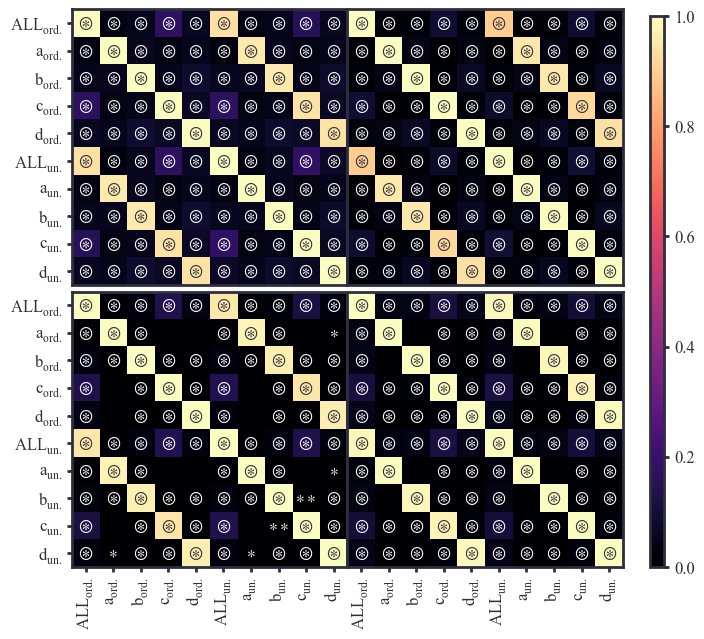

In [8]:
PT_TO_INCH: int = 72

PATH: list = [
    "untreat_redundancy_30.csv",
    "redundancy_30_*.csv",
    "redundancy_70_*.csv",
    "redundancy_90_*.csv"
]

PLOT_POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 455 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/REDUNDANCY_DATASET/" + path_i
    file: str = popen(command).readlines()[0].strip()
    print(f"[FILE]: '{file}'")

    LABEL: list = [
        "ALL$\mathregular{_{ord.}}$",
        "a$\mathregular{_{ord.}}$",
        "b$\mathregular{_{ord.}}$",
        "c$\mathregular{_{ord.}}$",
        "d$\mathregular{_{ord.}}$",
        "ALL$\mathregular{_{un.}}$",
        "a$\mathregular{_{un.}}$",
        "b$\mathregular{_{un.}}$",
        "c$\mathregular{_{un.}}$",
        "d$\mathregular{_{un.}}$"
    ]

    LABEL_RANGE: list = list(range(len(LABEL)))

    data: np.ndarray = np.genfromtxt(file, delimiter=",")[1:, 1:]
    r_matrix, p_matrix = corr_matrix(data)

    for part in ["top", "bottom", "left", "right"]:
        to_plot[PLOT_POSITION[i]].spines[part].set_linewidth(2)

    cor_plot = to_plot[PLOT_POSITION[i]].imshow(
        r_matrix,
        cmap="magma",
        vmin=0,
        vmax=1
    )

    # Show all ticks and label them with the respective list entries
    to_plot[PLOT_POSITION[i]].set_xticks(
        LABEL_RANGE,
        labels=LABEL,
        rotation=90,
        ha="right",
        va="center",
        rotation_mode="anchor"
    )

    to_plot[PLOT_POSITION[i]].set_yticks(LABEL_RANGE, labels=LABEL)

    for m in LABEL_RANGE:
        for n in LABEL_RANGE[m:]:
            if r_matrix[m, n] >= 0.5:
                color: str = BLACKBLUE
            else:
                color: str = "w"

            label: str = ""

            if p_matrix[m, n] <= 0.01:
                label = r"$\mathregular{\circledast}$"
            elif p_matrix[m, n] <= 0.05:
                label = r"$\mathregular{\ast\ast}$"
            elif p_matrix[m, n] <= 0.1:
                label = r"$\mathregular{\ast}$"

            text = to_plot[PLOT_POSITION[i]].text(
                x=m,
                y=n,
                s=label,
                ha="center",
                va="center",
                color=color
            )

            if m != n:
                text = to_plot[PLOT_POSITION[i]].text(
                    x=n,
                    y=m,
                    s=label,
                    ha="center",
                    va="center",
                    color=color
                )

    for i, to_plot_i in enumerate(to_plot.flat):
        to_plot_i.tick_params(
            width=0,
            which="both",
            bottom=False,
            top=False,
            labelbottom=False,
            left=False,
            labelleft=False
        )

        if i in [2, 3]:
            to_plot_i.tick_params(
                axis="x",
                width=2,
                which="both",
                bottom=True,
                labelbottom=True,
                left=True,
                labelleft=True
            )

        if i in [0, 2]:
            to_plot_i.tick_params(
                axis="y",
                width=2,
                which="both",
                bottom=True,
                labelbottom=True,
                left=True,
                labelleft=True
            )

axins = inset_axes(
    to_plot[1, 0],
    width="5%",
    height="200%",
    loc="lower left",
    bbox_to_anchor=(2.1, 0, 1, 1),
    bbox_transform=to_plot[1, 0].transAxes,
    borderpad=0,
)

figure.colorbar(cor_plot, cax=axins)

plot.savefig(
    "../../../data/output_plot/context_conservation_heatmap.pdf",
    bbox_inches="tight"
)


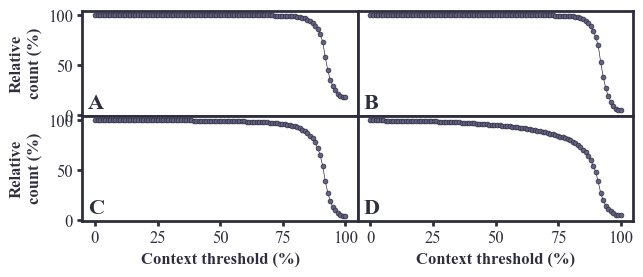

In [9]:
LEVEL: np.ndarray = np.linspace(0, 100, 100)

PT_TO_INCH: int = 72

PATH: list = [
    "untreat_redundancy_30.csv",
    "redundancy_30_*.csv",
    "redundancy_70_*.csv",
    "redundancy_90_*.csv"
]

PLOT_POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

LETTER: list = [
    "A",
    "B",
    "C",
    "D"
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 200 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

context_list: list = []

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/REDUNDANCY_DATASET/" + path_i
    file: str = popen(command).readlines()[0].strip()

    data: np.ndarray = np.genfromtxt(file, delimiter=",")[1:, 1]
    context_list += [data]

data_list: list = [[], [], [], []]

for point in LEVEL:
    for i in range(len(data_list)):
        count: float = np.sum(context_list[i] >= point) / \
            context_list[i].shape[0] * 100

        data_list[i] += list([count])

for i, pos_i in enumerate(PLOT_POSITION):
    to_plot[pos_i].plot(
        LEVEL,
        data_list[i],
        color=BLACKBLUE,
        lw=0.5,
        zorder=1
        
    )

    to_plot[pos_i].scatter(
        x=LEVEL,
        y=data_list[i],
        c=LIGHTBLACKBLUE,
        s=12,
        linewidth=0.5,
        edgecolor=BLACKBLUE,
        zorder=2
    )

    to_plot[pos_i].text(
        x=0.02,
        y=0.02,
        s=LETTER[i],
        fontweight="bold",
        fontsize=16,
        ha="left",
        va="bottom",
        transform=to_plot[pos_i].transAxes
    )


for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i >= 2:
        to_plot_i.set_xlabel(
            xlabel="Context threshold (%)",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i % 2 == 0:
        to_plot_i.set_ylabel(
            ylabel="Relative\ncount (%)",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

plot.savefig(
    "../../../data/output_plot/relativecount_vs_treshold.pdf",
    bbox_inches="tight"
)


In [10]:
def moving_average(array: np.ndarray, size: int) -> np.ndarray:
    """Transform an array into a moving average.

    Parameters
    ----------
    array : `np.ndarray`
        The array to transform.
    size : `int`
        Moving window to do the average.

    Returns
    -------
    `np.ndarray`
        The moving average array.
    """
    return np.convolve(array, np.ones(size), "valid") / size


PARSING PATH:   0%|          | 0/4 [00:00<?, ?it/s]

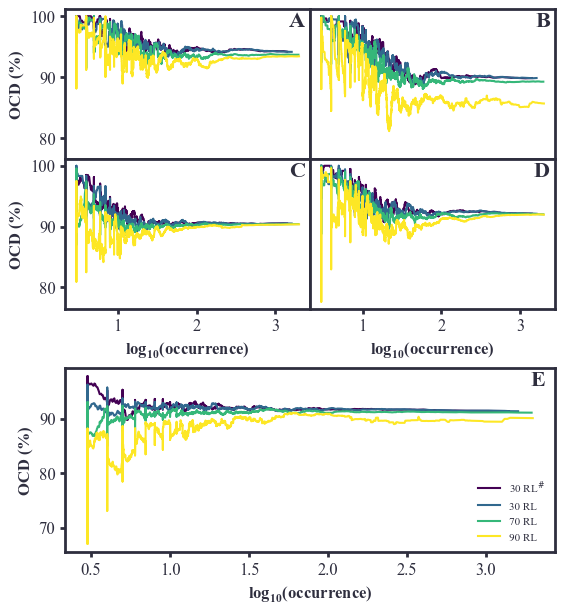

In [11]:
PT_TO_INCH: int = 72

PATH: list = [
    ("untreat_redundancy_30.csv", "default_domain"),
    ("redundancy_30_*.csv", "redundancy/30_percent_redundancy"),
    ("redundancy_70_*.csv", "redundancy/70_percent_redundancy"),
    ("redundancy_90_*.csv", "redundancy/90_percent_redundancy"),
]

PLOT_POSITION: list = [
    (0, slice(0, 3)),
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

INDEX_LETTER: list = [
    "E",
    "A",
    "B",
    "C",
    "D"
]

LABEL: list = [
    "30 RL$^\#$",
    "30 RL",
    "70 RL",
    "90 RL"
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 355 / PT_TO_INCH)
)

top_grid = plot.GridSpec(
    nrows=3,
    ncols=2,
    top=1/3 - 0.06,
    bottom=-1
)

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0,
    top=1,
    bottom=1/3 + 0.06
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

cmap = colormaps["viridis"]
color: object = cmap(np.linspace(0, 1, 4))

face_list: list = []

for i, path_i in enumerate(tqdm(PATH, "PARSING PATH")):
    command: str = f"ls ../../../data/REDUNDANCY_DATASET/{path_i[0]}"
    file: str = popen(command).readlines()[0].strip()
    context: np.ndarray = np.genfromtxt(file, delimiter=",")

    command = f"ls ../../../data/peitsch2vec/{path_i[1]}/characteristics*.npy"
    characteristic: object = np.transpose(np.load(
        popen(command).readlines()[0].strip(),
        allow_pickle=True
    ))
    frequency: object = np.log10(characteristic[5].astype("int64"))

    average: int = round(frequency.shape[0] / 100)

    for j, pos_j in enumerate(PLOT_POSITION):
        if i == 0:
            if j == 0:
                face_list += [figure.add_subplot(top_grid[pos_j])]
            else:
                face_list += [to_plot[pos_j]]

        face = face_list[j]

        face.plot(
            moving_average(frequency, average),
            moving_average(context[1:, j + 1], average),
            c=tuple(color[i]),
            zorder=2,
            label=LABEL[i]
        )

        if i != 0:
            continue

        face.text(
            x=0.98,
            y=0.98,
            s=INDEX_LETTER[j],
            fontweight="bold",
            fontsize=16,
            ha="right",
            va="top",
            transform=face.transAxes
        )

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

for i, face in enumerate(face_list):
    face.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i == 0 or i >= 3:
        face.set_xlabel(
            xlabel="log$\mathregular{_{10}}$(occurrence)",
            fontweight="bold"
        )

        face.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i in [0, 1, 3]:
        face.set_ylabel(
            ylabel="OCD (%)",
            fontweight="bold"
        )

        face.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

face_list[0].legend(
    loc="lower right",
    frameon=False,
    framealpha=0,
    fontsize=8
)

plot.savefig(
    "../../../data/output_plot/distance_context_vs_log10freq.pdf",
    bbox_inches="tight"
)


PARSING PATH:   0%|          | 0/4 [00:00<?, ?it/s]

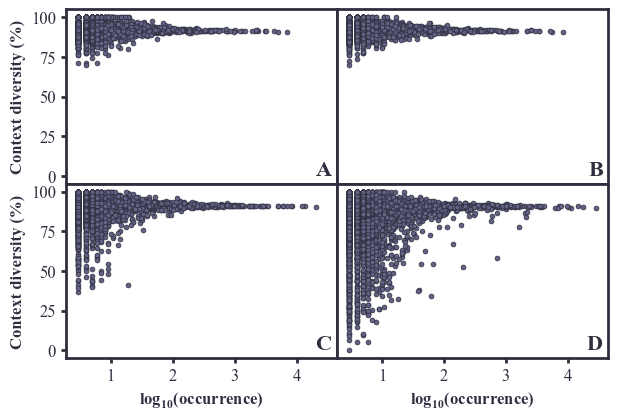

In [12]:
PT_TO_INCH: int = 72

PATH: list = [
    ("untreat_redundancy_30.csv", "default_domain"),
    ("redundancy_30_*.csv", "redundancy/30_percent_redundancy"),
    ("redundancy_70_*.csv", "redundancy/70_percent_redundancy"),
    ("redundancy_90_*.csv", "redundancy/90_percent_redundancy"),
]

PLOT_POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
]

INDEX_LETTER: list = [
    "A",
    "B",
    "C",
    "D"
]

LABEL: list = [
    "30 redundancy",
    "30 redundancy*",
    "70 redundancy*",
    "90 redundancy*"
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 300 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

for i, path_i in enumerate(tqdm(PATH, "PARSING PATH")):
    command: str = f"ls ../../../data/REDUNDANCY_DATASET/{path_i[0]}"
    file: str = popen(command).readlines()[0].strip()
    context: np.ndarray = np.genfromtxt(file, delimiter=",")[1:, 1]

    command = f"ls ../../../data/peitsch2vec/{path_i[1]}/characteristics*.npy"
    characteristic: object = np.transpose(np.load(
        popen(command).readlines()[0].strip(),
        allow_pickle=True
    ))

    peitsch_norm: object = characteristic[0].astype("int64")

    frequency: object = np.log10(
        characteristic[5].astype("int64")
    )[np.argsort(peitsch_norm)]

    to_plot[PLOT_POSITION[i]].scatter(
        x=frequency,
        y=context,
        c=LIGHTBLACKBLUE,
        s=12,
        linewidth=0.5,
        edgecolor=BLACKBLUE
    )

    plot.text(
        x=0.98,
        y=0.02,
        s=INDEX_LETTER[i],
        fontweight="bold",
        fontsize=16,
        ha="right",
        va="bottom",
        transform=to_plot[PLOT_POSITION[i]].transAxes
    )

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i >= 2:
        to_plot_i.set_xlabel(
            xlabel="log$\mathregular{_{10}}$(occurrence)",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i % 2 == 0:
        to_plot_i.set_ylabel(
            ylabel="Context diversity (%)",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

plot.savefig(
    ("../../../data/output_plot/noscope_distance_context_vs_"
     "log10freq.pdf"),
    bbox_inches="tight"
)


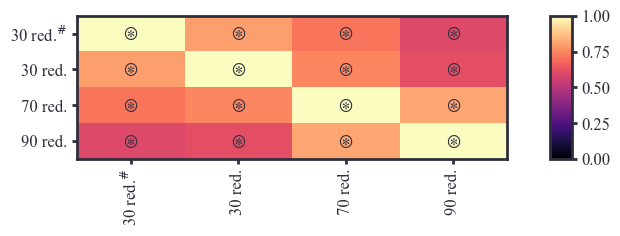

In [13]:
PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

LABEL: list = [
    "30 red.$^\#$",
    "30 red.",
    "70 red.",
    "90 red."
]

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i
    # Get data.
    data: object = np.load(
        popen(
            command + "embedding*.npy").readlines()[0].strip(),
        allow_pickle=True
    )

    characteristic: object = np.transpose(np.load(
        popen(
            command + "characteristics*.npy").readlines()[0].strip(),
        allow_pickle=True
    ))[0].astype("int64")

    if i == 0:
        peitsch_30_untreated: object = characteristic
        norm_30_untreated: object = np.linalg.norm(data, axis=1)
    elif i == 1:
        peitsch_30: object = characteristic
        norm_30: object = np.linalg.norm(data, axis=1)
    elif i == 2:
        peitsch_70: object = characteristic
        norm_70: object = np.linalg.norm(data, axis=1)
    else:
        peitsch_90: object = characteristic
        norm_90: object = np.linalg.norm(data, axis=1)

common_peitsch = peitsch_30_untreated

for p_i in [peitsch_30, peitsch_70, peitsch_90]:
    common_peitsch = np.intersect1d(common_peitsch, p_i)

norm_30_untreated = norm_30_untreated[np.isin(peitsch_30_untreated,
                                              common_peitsch)]
norm_30 = norm_30[np.isin(peitsch_30, common_peitsch)]
norm_70 = norm_70[np.isin(peitsch_70, common_peitsch)]
norm_90 = norm_90[np.isin(peitsch_90, common_peitsch)]

PT_TO_INCH: int = 72

PATH: list = [
    "untreat_redundancy_30.csv",
    "redundancy_30_*.csv",
    "redundancy_70_*.csv",
    "redundancy_90_*.csv",
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 152 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=1,
    ncols=1,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

LABEL_RANGE: list = list(range(len(LABEL)))
r_matrix, p_matrix = corr_matrix(np.vstack((norm_30_untreated, norm_30,
                                            norm_70, norm_90)).T)

for part in ["top", "bottom", "left", "right"]:
    to_plot.spines[part].set_linewidth(2)

cor_plot = to_plot.imshow(
    r_matrix,
    cmap="magma",
    vmin=0,
    vmax=1
)

# Show all ticks and label them with the respective list entries
to_plot.set_xticks(
    LABEL_RANGE,
    labels=LABEL,
    rotation=90,
    ha="right",
    va="center",
    rotation_mode="anchor"
)

to_plot.set_yticks(LABEL_RANGE, labels=LABEL)

for m in LABEL_RANGE:
    for n in LABEL_RANGE[m:]:
        if r_matrix[m, n] >= 0.5:
            color: str = BLACKBLUE
        else:
            color: str = "w"

        label: str = ""

        if p_matrix[m, n] <= 0.01:
            label = r"$\mathregular{\circledast}$"
        elif p_matrix[m, n] <= 0.05:
            label = r"$\mathregular{\ast\ast}$"
        elif p_matrix[m, n] <= 0.1:
            label = r"$\mathregular{\ast}$"

        text = to_plot.text(
            x=m,
            y=n,
            s=label,
            ha="center",
            va="center",
            color=color
        )

        if m != n:
            text = to_plot.text(
                x=n,
                y=m,
                s=label,
                ha="center",
                va="center",
                color=color
            )

to_plot.tick_params(
    axis="x",
    width=2,
    which="both",
    bottom=True,
    labelbottom=True,
    left=True,
    labelleft=True
)

to_plot.tick_params(
    axis="y",
    width=2,
    which="both",
    bottom=True,
    labelbottom=True,
    left=True,
    labelleft=True
)

axins = inset_axes(
    to_plot,
    width="5%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.1, 0, 1, 1),
    bbox_transform=to_plot.transAxes,
    borderpad=0,
)

to_plot.set_aspect(1/3)

figure.colorbar(cor_plot, cax=axins)

plot.savefig(
    "../../../data/output_plot/norm_correlation_heatmap.pdf",
    bbox_inches="tight"
)


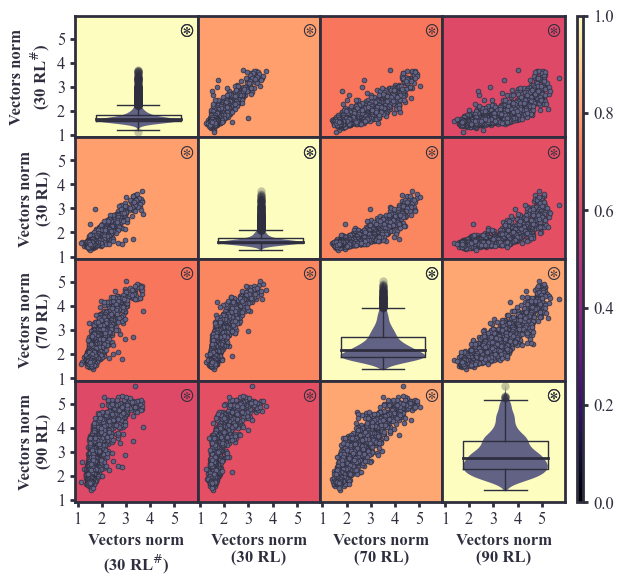

In [14]:
figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 455 / PT_TO_INCH)
)

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2,
    "boxplot.flierprops.color": BLACKBLUE,
    "boxplot.flierprops.markerfacecolor": BLACKBLUE + "44",
    "boxplot.flierprops.markeredgecolor": "None",
    "boxplot.boxprops.color": BLACKBLUE,
    "boxplot.whiskerprops.color": BLACKBLUE,
    "boxplot.capprops.color": BLACKBLUE,
    "boxplot.medianprops.linewidth": 2,
    "boxplot.medianprops.color": BLACKBLUE
})

grid = figure.add_gridspec(
    nrows=4,
    ncols=4,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

data_list: list = [norm_30_untreated, norm_30, norm_70, norm_90]
data_index: list = list(range(len(data_list)))

r_matrix, p_matrix = corr_matrix(np.vstack((norm_30_untreated, norm_30,
                                            norm_70, norm_90)).T)

cmap = colormaps["magma"]
ticks: np.ndarray = np.linspace(1, 5, 5, dtype=int)

for i in data_index:
    for j in data_index[i:]:
        if i == j:
            violin_plot = to_plot[(i, j)].violinplot(
                data_list[i],
                vert=True,
                showmeans=False,
                showextrema=False,
                showmedians=False,
                widths=3.5,
                positions=[3.5]
            )

            box_plot = to_plot[(i, j)].boxplot(
                data_list[i],
                vert=True,
                # labels=[(LABEL * 2)[i]] * 4,
                meanline=True,
                widths=3.5,
                positions=[3.5]
            )

            for patch in violin_plot["bodies"]:
                patch.set_facecolor(LIGHTBLACKBLUE)
                patch.set_alpha(1)

        else:
            to_plot[(i, j)].scatter(
                data_list[j],
                data_list[i],
                c=LIGHTBLACKBLUE,
                s=12,
                linewidth=0.5,
                edgecolor=BLACKBLUE
            )

            to_plot[(j, i)].scatter(
                data_list[i],
                data_list[j],
                c=LIGHTBLACKBLUE,
                s=12,
                linewidth=0.5,
                edgecolor=BLACKBLUE
            )

        to_plot[(i, j)].set_facecolor(cmap(r_matrix[i, j]))
        to_plot[(j, i)].set_facecolor(cmap(r_matrix[j, i]))

        to_plot[(i, j)].set_xticks(ticks=ticks, labels=ticks)
        to_plot[(i, j)].set_yticks(ticks=ticks, labels=ticks)

        if r_matrix[i, j] >= 0.5:
            color: str = BLACKBLUE
        else:
            color: str = "w"

        label: str = ""

        if p_matrix[i, j] <= 0.01:
            label = r"$\mathregular{\circledast}$"
        elif p_matrix[i, j] <= 0.05:
            label = r"$\mathregular{\ast\ast}$"
        elif p_matrix[i, j] <= 0.1:
            label = r"$\mathregular{\ast}$"

        to_plot[(i, j)].text(
            x=0.85,
            y=0.95,
            s=label,
            ha="left",
            va="top",
            color=color,
            transform=to_plot[(i, j)].transAxes
        )

        to_plot[(j, i)].text(
            x=0.85,
            y=0.95,
            s=label,
            ha="left",
            va="top",
            color=color,
            transform=to_plot[(j, i)].transAxes
        )

LABEL: list = ["Vectors norm\n(30 RL$^\#$)", "Vectors norm\n(30 RL)",
               "Vectors norm\n(70 RL)", "Vectors norm\n(90 RL)"]

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i >= 12:
        to_plot_i.set_xlabel(
            xlabel=LABEL[i % 4],
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i % 4 == 0:
        to_plot_i.set_ylabel(
            ylabel=LABEL[i // 4],
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

axins = inset_axes(
    to_plot[3, 3],
    width="5%",
    height="400%",
    loc="lower left",
    bbox_to_anchor=(1.1, 0, 1, 1),
    bbox_transform=to_plot[3, 3].transAxes,
    borderpad=0,
)

figure.colorbar(cm.ScalarMappable(norm=None, cmap="magma"), cax=axins)

plot.savefig(
    ("../../../data/output_plot/"
     "norm_correlation_scatterplot_heatmap.pdf"),
    bbox_inches="tight"
)


0.47712125471966244 - 3.8491121661845775
0.47712125471966244 - 3.9231921904206675
0.47712125471966244 - 4.315676520348013
0.47712125471966244 - 4.453333631837039


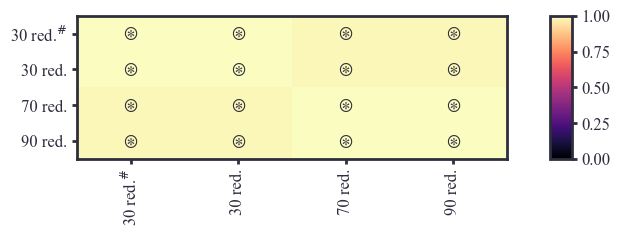

In [15]:
PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

LABEL: list = [
    "30 red.$^\#$",
    "30 red.",
    "70 red.",
    "90 red."
]

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i

    characteristic: object = np.transpose(np.load(
        popen(
            command + "characteristics*.npy").readlines()[0].strip(),
        allow_pickle=True
    ))

    if i == 0:
        freq_30_untreated: object = np.log10(characteristic[5].astype("int64"))
        peitsch_30_untreated: object = characteristic[0].astype("int64")
    elif i == 1:
        freq_30: object = np.log10(characteristic[5].astype("int64"))
        peitsch_30: object = characteristic[0].astype("int64")
    elif i == 2:
        freq_70: object = np.log10(characteristic[5].astype("int64"))
        peitsch_70: object = characteristic[0].astype("int64")
    else:
        freq_90: object = np.log10(characteristic[5].astype("int64"))
        peitsch_90: object = characteristic[0].astype("int64")

common_peitsch = peitsch_30_untreated

for p_i in [peitsch_30, peitsch_70, peitsch_90]:
    common_peitsch = np.intersect1d(common_peitsch, p_i)

freq_30_untreated = freq_30_untreated[np.isin(peitsch_30_untreated,
                                              common_peitsch)]
freq_30 = freq_30[np.isin(peitsch_30, common_peitsch)]
freq_70 = freq_70[np.isin(peitsch_70, common_peitsch)]
freq_90 = freq_90[np.isin(peitsch_90, common_peitsch)]

PT_TO_INCH: int = 72

PATH: list = [
    "untreat_redundancy_30.csv",
    "redundancy_30_*.csv",
    "redundancy_70_*.csv",
    "redundancy_90_*.csv",
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 152 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=1,
    ncols=1,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

LABEL_RANGE: list = list(range(len(LABEL)))
r_matrix, p_matrix = corr_matrix(np.vstack((freq_30_untreated, freq_30,
                                            freq_70, freq_90)).T)


print(freq_30_untreated.min(), "-", freq_30_untreated.max())
print(freq_30.min(), "-", freq_30.max())
print(freq_70.min(), "-", freq_70.max())
print(freq_90.min(), "-", freq_90.max())

for part in ["top", "bottom", "left", "right"]:
    to_plot.spines[part].set_linewidth(2)

cor_plot = to_plot.imshow(
    r_matrix,
    cmap="magma",
    vmin=0,
    vmax=1
)

# Show all ticks and label them with the respective list entries
to_plot.set_xticks(
    LABEL_RANGE,
    labels=LABEL,
    rotation=90,
    ha="right",
    va="center",
    rotation_mode="anchor"
)

to_plot.set_yticks(LABEL_RANGE, labels=LABEL)

for m in LABEL_RANGE:
    for n in LABEL_RANGE[m:]:
        if r_matrix[m, n] >= 0.5:
            color: str = BLACKBLUE
        else:
            color: str = "w"

        label: str = ""

        if p_matrix[m, n] <= 0.01:
            label = r"$\mathregular{\circledast}$"
        elif p_matrix[m, n] <= 0.05:
            label = r"$\mathregular{\ast\ast}$"
        elif p_matrix[m, n] <= 0.1:
            label = r"$\mathregular{\ast}$"

        text = to_plot.text(
            x=m,
            y=n,
            s=label,
            ha="center",
            va="center",
            color=color
        )

        if m != n:
            text = to_plot.text(
                x=n,
                y=m,
                s=label,
                ha="center",
                va="center",
                color=color
            )

to_plot.tick_params(
    axis="x",
    width=2,
    which="both",
    bottom=True,
    labelbottom=True,
    left=True,
    labelleft=True
)

to_plot.tick_params(
    axis="y",
    width=2,
    which="both",
    bottom=True,
    labelbottom=True,
    left=True,
    labelleft=True
)

axins = inset_axes(
    to_plot,
    width="5%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.1, 0, 1, 1),
    bbox_transform=to_plot.transAxes,
    borderpad=0,
)

to_plot.set_aspect(1/3)

figure.colorbar(cor_plot, cax=axins)

plot.savefig(
    "../../../data/output_plot/frequency_correlation_heatmap.pdf",
    bbox_inches="tight"
)


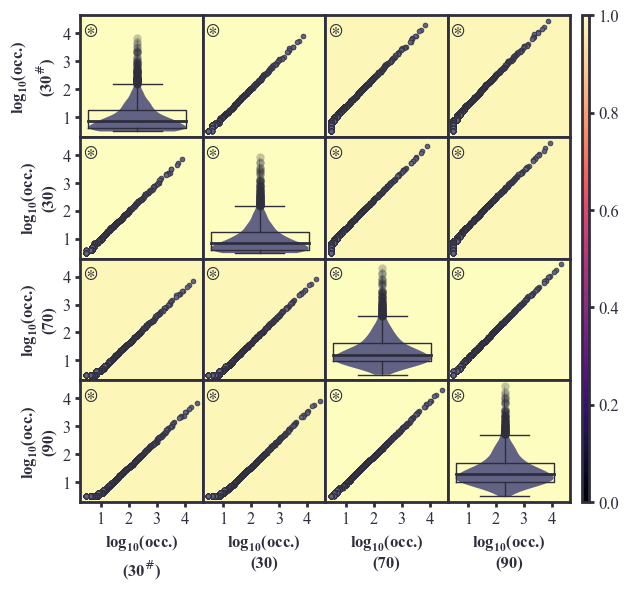

In [16]:
figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 455 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=4,
    ncols=4,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

data_list: list = [freq_30_untreated, freq_30, freq_70, freq_90]
data_index: list = list(range(len(data_list)))

pos_list: list = []

for data_i in data_list:
    pos: float = (data_i.max() - data_i.min()) / 2 + data_i.min()
    pos_list += [pos]

pos = sum(pos_list) / len(pos_list)

r_matrix, p_matrix = corr_matrix(np.vstack((freq_30_untreated, freq_30,
                                            freq_70, freq_90)).T)

cmap = colormaps["magma"]
ticks: np.ndarray = np.linspace(1, 4, 4, dtype=int)

for i in data_index:
    for j in data_index[i:]:
        if i == j:
            violin_plot = to_plot[(i, j)].violinplot(
                data_list[i],
                vert=True,
                showmeans=False,
                showextrema=False,
                showmedians=False,
                widths=3.5,
                positions=[pos]
            )

            box_plot = to_plot[(i, j)].boxplot(
                data_list[i],
                vert=True,
                # labels=[(LABEL * 2)[i]] * 4,
                meanline=True,
                widths=3.5,
                positions=[pos]
            )

            for patch in violin_plot["bodies"]:
                patch.set_facecolor(LIGHTBLACKBLUE)
                patch.set_alpha(1)

        else:
            to_plot[(i, j)].scatter(
                data_list[i],
                data_list[j],
                c=LIGHTBLACKBLUE,
                s=12,
                linewidth=0.5,
                edgecolor=BLACKBLUE
            )

            to_plot[(j, i)].scatter(
                data_list[j],
                data_list[i],
                c=LIGHTBLACKBLUE,
                s=12,
                linewidth=0.5,
                edgecolor=BLACKBLUE
            )

        to_plot[(i, j)].set_facecolor(cmap(r_matrix[i, j]))
        to_plot[(j, i)].set_facecolor(cmap(r_matrix[j, i]))

        to_plot[(i, j)].set_xticks(ticks=ticks, labels=ticks)
        to_plot[(i, j)].set_yticks(ticks=ticks, labels=ticks)

        if r_matrix[i, j] >= 0.5:
            color: str = BLACKBLUE
        else:
            color: str = "w"

        label: str = ""

        if p_matrix[i, j] <= 0.01:
            label = r"$\mathregular{\circledast}$"
        elif p_matrix[i, j] <= 0.05:
            label = r"$\mathregular{\ast\ast}$"
        elif p_matrix[i, j] <= 0.1:
            label = r"$\mathregular{\ast}$"

        to_plot[(i, j)].text(
            x=0.02,
            y=0.95,
            s=label,
            ha="left",
            va="top",
            color=color,
            transform=to_plot[(i, j)].transAxes
        )

        if i != j:
            to_plot[(j, i)].text(
                x=0.02,
                y=0.95,
                s=label,
                ha="left",
                va="top",
                color=color,
                transform=to_plot[(j, i)].transAxes
            )

LABEL: list = [
    "log$\mathregular{_{10}}$(occ.)\n(30$^\#$)",
    "log$\mathregular{_{10}}$(occ.)\n(30)",
    "log$\mathregular{_{10}}$(occ.)\n(70)",
    "log$\mathregular{_{10}}$(occ.)\n(90)"
]

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i >= 12:
        to_plot_i.set_xlabel(
            xlabel=LABEL[i % 4],
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i % 4 == 0:
        to_plot_i.set_ylabel(
            ylabel=LABEL[i // 4],
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

axins = inset_axes(
    to_plot[3, 3],
    width="5%",
    height="400%",
    loc="lower left",
    bbox_to_anchor=(1.1, 0, 1, 1),
    bbox_transform=to_plot[3, 3].transAxes,
    borderpad=0,
)

figure.colorbar(cm.ScalarMappable(norm=None, cmap="magma"), cax=axins)

plot.savefig(
    ("../../../data/output_plot/"
     "frequency_correlation_scatterplot_heatmap.pdf"),
    bbox_inches="tight"
)


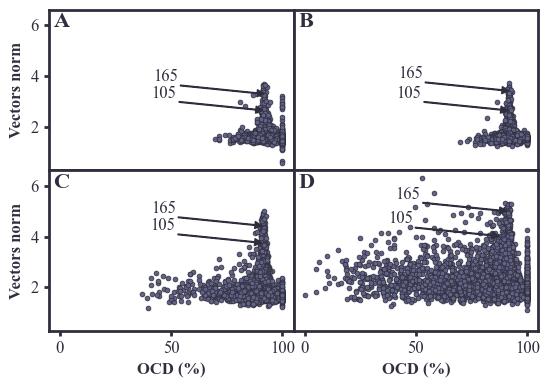

In [17]:
PATH: list = [
    ("untreat_redundancy_30.csv", "default_domain"),
    ("redundancy_30_*.csv", "redundancy/30_percent_redundancy"),
    ("redundancy_70_*.csv", "redundancy/70_percent_redundancy"),
    ("redundancy_90_*.csv", "redundancy/90_percent_redundancy")
]

POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
]

INDEX_LETTER: list = [
    "A",
    "B",
    "C",
    "D"
]

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 300 / PT_TO_INCH)
)

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/peitsch2vec/" + path_i[1]
    # Get data.
    data: object = np.load(
        popen(command + "/embedding*.npy").readlines()[0].strip(),
        allow_pickle=True
    )

    peitsch_norm: object = np.transpose(np.load(
        popen(command + "/characteristics*.npy").readlines()[0].strip(),
        allow_pickle=True
    ))[0].astype("int64")

    norm: object = np.linalg.norm(data, axis=1)[np.argsort(peitsch_norm)]
    peitsch = peitsch_norm[np.argsort(peitsch_norm)]

    command: str = f"ls ../../../data/REDUNDANCY_DATASET/" + path_i[0]
    file: str = popen(command).readlines()[0].strip()

    peitsch_context: np.ndarray = np.genfromtxt(
        file,
        delimiter=","
    )[1:, 0].astype(int)

    context: np.ndarray = np.genfromtxt(
        file,
        delimiter=","
    )[1:, 1][np.argsort(peitsch_context)]

    to_plot[POSITION[i]].scatter(
        x=context,
        y=norm,
        c=LIGHTBLACKBLUE,
        s=12,
        linewidth=0.5,
        edgecolor=BLACKBLUE
    )

    to_plot[POSITION[i]].text(
        x=0.02,
        y=0.98,
        s=INDEX_LETTER[i],
        fontweight="bold",
        fontsize=16,
        ha="left",
        va="top",
        transform=to_plot[POSITION[i]].transAxes
    )
    
    
    for p_i in [105, 165]:
        to_plot[POSITION[i]].annotate(
            p_i,
            xy=(context[peitsch == p_i][0], norm[peitsch == p_i][0]),
            xytext=(context[peitsch == p_i][0] - 50,
                    norm[peitsch == p_i][0] + 0.5),
            arrowprops=dict(
                facecolor=BLACKBLUE,
                edgecolor=BLACKBLUE,
                width=0.5,
                headwidth=5,
                headlength=5
            )
        )

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i in [2, 3]:
        to_plot_i.set_xlabel(
            xlabel="OCD (%)",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i in [0, 2]:
        to_plot_i.set_ylabel(
            ylabel="Vectors norm",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

plot.savefig(
    "../../../data/output_plot/norm_vs_distance_context.pdf",
    bbox_inches="tight"
)


741


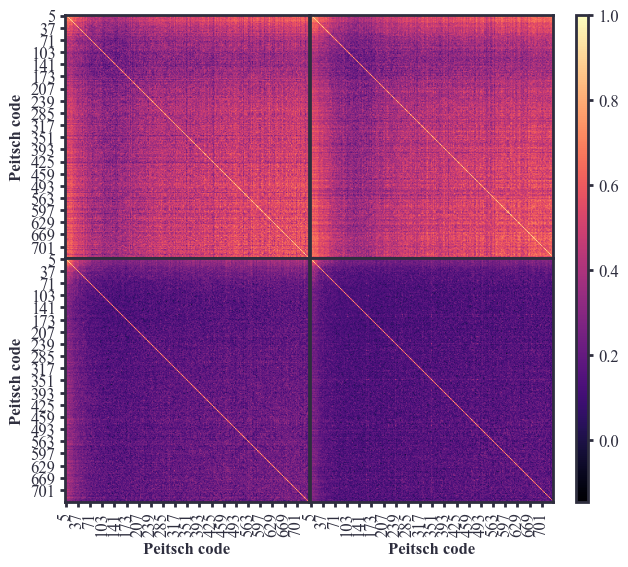

In [18]:
PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

peitsch_list: list = []

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i

    characteristic: object = np.transpose(np.load(
        popen(
            command + "characteristics*.npy").readlines()[0].strip(),
        allow_pickle=True
    ))[0].astype("int64")

    peitsch_list += [characteristic]

    if i == 0:
        common_peitsch: np.ndarray = characteristic
    else:
        common_peitsch = np.intersect1d(common_peitsch, characteristic)

PATH: list = [
    "default_domain",
    "redundancy/30_percent_redundancy",
    "redundancy/70_percent_redundancy",
    "redundancy/90_percent_redundancy"
]

POSITION: list = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
]

INDEX_LETTER: list = [
    "A",
    "B",
    "C",
    "D"
]

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 455 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=2,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

MAX_COSINE_SIZE: int = 300
N: int = int(MAX_COSINE_SIZE / 20)
min_val: float = 1

print(common_peitsch[MAX_COSINE_SIZE])

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/peitsch2vec/" + path_i

    filter: np.ndarray = np.isin(peitsch_list[i], common_peitsch)

    # Get data.
    cosine: object = np.load(
        popen(command + "/matrix_cosine_2023*.npy").readlines()[0].strip(),
        allow_pickle=True
    ).min()

    min_val = min(min_val, cosine)

for i, path_i in enumerate(PATH):
    command: str = "ls ../../../data/peitsch2vec/" + path_i

    filter: np.ndarray = np.isin(peitsch_list[i], common_peitsch)

    # Get data.
    cosine: object = np.load(
        popen(command + "/matrix_cosine_2023*.npy").readlines()[0].strip(),
        allow_pickle=True
    )

    cor_plot = to_plot[POSITION[i]].imshow(
        cosine[filter].T[filter].T[:MAX_COSINE_SIZE, :MAX_COSINE_SIZE],
        cmap="magma",
        vmin=min_val,
        vmax=1
    )

    pos: np.ndarray = np.array(list(range(MAX_COSINE_SIZE)))
    tick: np.ndarray = common_peitsch[:MAX_COSINE_SIZE][pos % N == 0]

    if i >= 2:
        to_plot[POSITION[i]].set_xticks(pos[pos % N == 0])
        to_plot[POSITION[i]].set_xticklabels(tick, rotation=90)

        to_plot[POSITION[i]].set_xlabel(
            xlabel="Peitsch code",
            fontweight="bold"
        )

    if i % 2 == 0:
        to_plot[POSITION[i]].set_yticks(pos[pos % N == 0])
        to_plot[POSITION[i]].set_yticklabels(tick)

        to_plot[POSITION[i]].set_ylabel(
            ylabel="Peitsch code",
            fontweight="bold"
        )
    else:
        to_plot[POSITION[i]].tick_params(
            axis="y",
            width=0,
            which="both",
            bottom=False,
            top=False,
            labelbottom=False,
            left=False,
            labelleft=False
        )

axins = inset_axes(
    to_plot[1, 0],
    width="5%",
    height="200%",
    loc="lower left",
    bbox_to_anchor=(2.1, 0, 1, 1),
    bbox_transform=to_plot[1, 0].transAxes,
    borderpad=0,
)

figure.colorbar(cor_plot, cax=axins)

plot.savefig(
    "../../../data/output_plot/cosine_distance_matrix.pdf",
    bbox_inches="tight"
)


PARSING PATH:   0%|          | 0/4 [00:00<?, ?it/s]

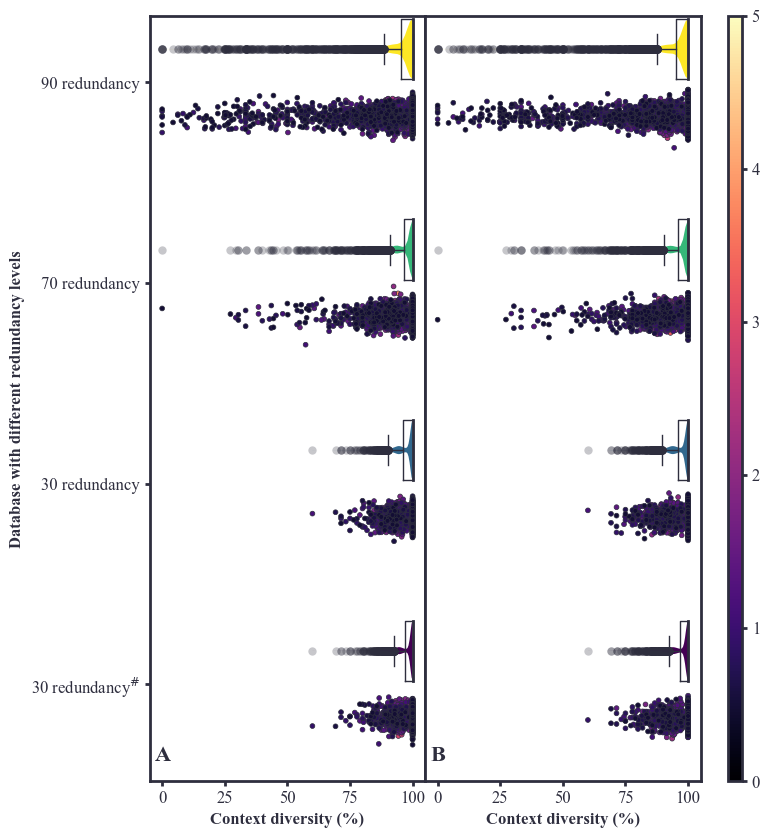

In [19]:
PT_TO_INCH: int = 72

PATH: list = [
    ("untreat_redundancy_30.csv", "default_domain"),
    ("redundancy_30_*.csv", "redundancy/30_percent_redundancy"),
    ("redundancy_70_*.csv", "redundancy/70_percent_redundancy"),
    ("redundancy_90_*.csv", "redundancy/90_percent_redundancy"),
]

INDEX_LETTER: list = [
    "A",
    "B"
]

LABEL: list = [
    "30 redundancy$^\#$",
    "30 redundancy",
    "70 redundancy",
    "90 redundancy"
]

FREQUENCY_MAX: int = 5

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 600 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=1,
    ncols=2,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

figure.tight_layout()

cmap = colormaps["viridis"]
color: object = cmap(np.linspace(0, 1, 4))

cmap_magma = colormaps["magma"]

y_label_pos: list = []

for i, path_i in enumerate(tqdm(PATH, "PARSING PATH")):
    command: str = f"ls ../../../data/REDUNDANCY_DATASET/{path_i[0]}"
    file: str = popen(command).readlines()[0].strip()
    context: np.ndarray = np.genfromtxt(file, delimiter=",")

    command = f"ls ../../../data/peitsch2vec/{path_i[1]}/characteristics*.npy"
    characteristic: object = np.transpose(np.load(
        popen(command).readlines()[0].strip(),
        allow_pickle=True
    ))
    frequency: object = np.log10(characteristic[5].astype("int64"))
    
    average: int = round(frequency.shape[0] / 100)

    for j, data_j in enumerate([1, 6]):
        violin_plot = to_plot[j].violinplot(
            context[1:, data_j + 1],
            vert=False,
            showmeans=False,
            showextrema=False,
            showmedians=False,
            widths=0.9,
            positions=[i * 3 + 1]
        )

        box_plot = to_plot[j].boxplot(
            context[1:, data_j + 1],
            vert=False,
            labels=[LABEL[i]],
            meanline=True,
            widths=0.9,
            positions=[i * 3 + 1]
        )

        for patch in violin_plot["bodies"]:
                patch.set_facecolor(color[i])
                patch.set_alpha(1)

        if j == 0:
            y_label_pos += [i * 3 + 0.5]

        y_scatter: np.ndarray = np.random.normal(
            loc=i * 3,
            scale=0.1,
            size=context[1:, data_j + 1].shape[0]
        )
        
        to_plot[j].scatter(
            x=context[1:, data_j + 1],
            y=y_scatter,
            c=cmap_magma(frequency / FREQUENCY_MAX),
            s=12,
            linewidth=0.5,
            edgecolor=BLACKBLUE
        )

        if i != 0:
            continue

        plot.text(
            x=0.02,
            y=0.02,
            s=INDEX_LETTER[j],
            fontweight="bold",
            fontsize=16,
            ha="left",
            va="bottom",
            transform=to_plot[j].transAxes
        )

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i >= 0:
        to_plot_i.set_xlabel(
            xlabel="Context diversity (%)",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i % 2 == 0:
        to_plot_i.set_ylabel(
            ylabel="Database with different redundancy levels",
            fontweight="bold"
        )

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

axins = inset_axes(
    to_plot[1],
    width="5%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.1, 0, 1, 1),
    bbox_transform=to_plot[1].transAxes,
    borderpad=0
)

figure.colorbar(
    mappable=cm.ScalarMappable(norm=Normalize(vmin=0, vmax=5), cmap="magma"),
    cax=axins
)

to_plot[0].set_yticks(y_label_pos)
to_plot[0].set_yticklabels(LABEL)

plot.savefig(
    ("../../../data/output_plot/"
     "context_distribution_log10_freq_scatter.pdf"),
    bbox_inches="tight"
)


Parsing path:   0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_21077/3956500977.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  figure.tight_layout()


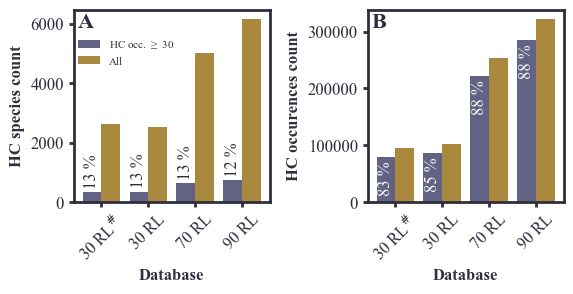

In [20]:
PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

LABEL: list = [
    "30 RL$^\#$",
    "30 RL",
    "70 RL",
    "90 RL"
]

max_freq_list: list = []
freq_list: list = []
occurence_list: list = []
occurence_min_list: list = []

for i, path_i in enumerate(tqdm(PATH, "Parsing path")):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i

    characteristic: object = np.transpose(np.load(
        popen(
            command + "characteristics*.npy").readlines()[0].strip(),
        allow_pickle=True
    ))[5].astype("int64")

    max_freq: object = characteristic.shape[0]
    freq: object = characteristic[characteristic >= 30].shape[0]
    occurence: int = np.sum(characteristic)
    occurence_min: int = np.sum(characteristic[characteristic >= 30])

    max_freq_list += [max_freq]
    freq_list += [freq]
    occurence_list += [occurence]
    occurence_min_list += [occurence_min]

PT_TO_INCH: int = 72

PATH: list = [
    "untreat_redundancy_30.csv",
    "redundancy_30_*.csv",
    "redundancy_70_*.csv",
    "redundancy_90_*.csv",
]

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 180 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=1,
    ncols=2,
    hspace=0,
    wspace=0.5
)

to_plot = grid.subplots(
    sharex=True,
    sharey=False
)

figure.tight_layout()

x_pos: np.ndarray = np.arange(4)
SHIFT: int = 0.4

x_pos: np.ndarray = np.arange(4)

to_plot[0].bar(
    x_pos - SHIFT / 2,
    freq_list,
    color=LIGHTBLACKBLUE,
    width=SHIFT,
    label="HC occ. $\mathregular{\geq}$ 30"
)

to_plot[0].bar(
    x_pos + SHIFT / 2,
    max_freq_list,
    color=OCREYELLOW,
    width=SHIFT,
    label="All"
)

to_plot[1].bar(
    x_pos - SHIFT / 2,
    occurence_min_list,
    color=LIGHTBLACKBLUE,
    width=SHIFT,
    label="HC occ. $\mathregular{\geq}$ 30"
)

to_plot[1].bar(
    x_pos + SHIFT / 2,
    occurence_list,
    color=OCREYELLOW,
    width=SHIFT,
    label="All"
)

to_plot[0].set_xlabel(
    xlabel="Database",
    fontweight="bold"
)

to_plot[0].set_ylabel(
    ylabel="HC species count",
    fontweight="bold"
)

to_plot[1].set_xlabel(
    xlabel="Database",
    fontweight="bold"
)

to_plot[1].set_ylabel(
    ylabel="HC occurences count",
    fontweight="bold"
)

to_plot[0].legend(
    loc="upper left",
    bbox_to_anchor=(-0.03, 0.90),
    frameon=False,
    framealpha=0,
    fontsize=8
)

for i in range(2):
    plot.text(
        x=0.02,
        y=0.98,
        s=["A", "B"][i],
        fontweight="bold",
        fontsize=16,
        ha="left",
        va="top",
        transform=to_plot[i].transAxes
    )

per_freq: np.ndarray = np.array(freq_list) / np.array(max_freq_list) * 100
per_occur: np.ndarray = np.array(occurence_min_list) \
    / np.array(occurence_list) * 100


for i, label_i in enumerate(x_pos - SHIFT / 2):
    to_plot[0].text(
        x=label_i,
        y=freq_list[i],
        s=f" {per_freq[i]:.0f} %",
        ha="center",
        va="bottom",
        color=BLACKBLUE,
        rotation=90
    )

    to_plot[1].text(
        x=label_i,
        y=occurence_min_list[i],
        s=f"{per_occur[i]:.0f} % ",
        ha="center",
        va="top",
        color="white",
        rotation=90
    )

to_plot[0].set_xticks(x_pos, labels=LABEL, rotation=45)
to_plot[1].set_xticks(x_pos, labels=LABEL, rotation=45)

plot.savefig(
    "../../../data/output_plot/hist_countedhc_database.pdf",
    bbox_inches="tight"
)


['ALL_ORDER' 'ALL_UNORDER']
['A_ORDER' 'A_UNORDER']
['B_ORDER' 'B_UNORDER']
['C_ORDER' 'C_UNORDER']
['D_ORDER' 'D_UNORDER']


PARSING DATA:   0%|          | 0/20 [00:00<?, ?it/s]

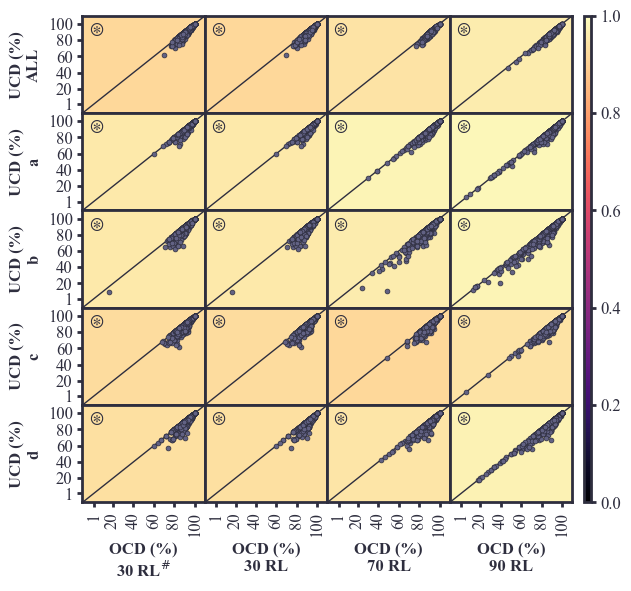

In [21]:
PATH: list = [
    "untreat_redundancy_30.csv",
    "redundancy_30_*.csv",
    "redundancy_70_*.csv",
    "redundancy_90_*.csv"
]

CSV_POS: list = [
    (1, 6),
    (2, 7),
    (3, 8),
    (4, 9),
    (5, 10),
]

common_p_code: np.ndarray = []
peitsch_list: list = []
data_list: list = []

for csv_i in CSV_POS:
    for i, path_i in enumerate(PATH):
        command: str = "ls ../../../data/REDUNDANCY_DATASET/" + path_i
        file: str = popen(command).readlines()[0].strip()

        data: np.ndarray = np.genfromtxt(file, delimiter=",")[1:, csv_i]
        p_code: np.ndarray = np.genfromtxt(file,
                                           delimiter=",")[1:, 0].astype(int)

        if i == 0:
            header: np.ndarray = np.genfromtxt(
                file,
                dtype=str,
                delimiter=","
            )[0, csv_i]

            print(header)

        if i == 0:
            common_p_code = np.array(p_code)
        else:
            common_p_code = np.intersect1d(common_p_code, p_code)

        peitsch_list += [p_code]
        data_list += [data]

clean_data: np.ndarray = np.array([])

for i, peitsch in enumerate(peitsch_list):
    filter: np.ndarray = np.isin(peitsch, common_p_code)

    if i == 0:
        clean_data = data_list[i][filter, :]
    else:
        clean_data = np.hstack((clean_data, data_list[i][filter, :]))

clean_data = clean_data.T
figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 455 / PT_TO_INCH)
)

figure.tight_layout()

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

grid = figure.add_gridspec(
    nrows=5,
    ncols=4,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

cmap = colormaps["magma"]
data_index: list = list(range(clean_data.shape[0]))
ticks: np.ndarray = np.linspace(1, 100, 6, dtype=int)

position: list = []

for i in range(5):
    for j in range(4):
        position += [(i, j)]

for i in tqdm(range(len(position)), "PARSING DATA"):
    r_2_i, p_val_i = pearsonr(clean_data[i * 2], clean_data[i * 2 + 1])
    color: str = BLACKBLUE
    label: str = ""

    to_plot[position[i]].axline(
        xy1=(0, 0),
        xy2=(1, 1),
        color=BLACKBLUE,
        lw=1,
        zorder=0
    )

    to_plot[position[i]].scatter(
        clean_data[i * 2],
        clean_data[i * 2 + 1],
        c=LIGHTBLACKBLUE,
        s=12,
        linewidth=0.5,
        edgecolor=BLACKBLUE
    )

    to_plot[position[i]].set_facecolor(cmap(r_2_i ** 2))

    to_plot[position[i]].set_xticks(ticks=ticks, labels=ticks, rotation=90)
    to_plot[position[i]].set_yticks(ticks=ticks, labels=ticks)

    to_plot[position[i]].margins(0.1)

    if r_2_i ** 2 < 0.5:
        color: str = "w"

    if p_val_i <= 0.01:
        label = r"$\mathregular{\circledast}$"
    elif p_val_i <= 0.05:
        label = r"$\mathregular{\ast\ast}$"
    elif p_val_i <= 0.1:
        label = r"$\mathregular{\ast}$"

    to_plot[position[i]].text(
        x=0.05,
        y=0.95,
        s=label,
        ha="left",
        va="top",
        color=color,
        transform=to_plot[position[i]].transAxes
    )

x_label: list = ["30 RL$^\#$", "30 RL", "70 RL", "90 RL"]
x_lab_shift: int = 0

y_label: list = ["ALL", "a", "b", "c", "d"]
y_lab_shift: int = 0

for i, to_plot_i in enumerate(to_plot.flat):
    to_plot_i.tick_params(
        width=0,
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False
    )

    if i >= 16:
        to_plot_i.set_xlabel(
            xlabel=f"OCD (%)\n{x_label[x_lab_shift]}",
            fontweight="bold"
        )

        x_lab_shift += 1

        to_plot_i.tick_params(
            axis="x",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

    if i % 4 == 0:
        to_plot_i.set_ylabel(
            ylabel=f"UCD (%)\n{y_label[y_lab_shift]}",
            fontweight="bold"
        )

        y_lab_shift += 1

        to_plot_i.tick_params(
            axis="y",
            width=2,
            which="both",
            bottom=True,
            labelbottom=True,
            left=True,
            labelleft=True
        )

axins = inset_axes(
    to_plot[(4, 3)],
    width="5%",
    height="500%",
    loc="lower left",
    bbox_to_anchor=(1.1, 0, 1, 1),
    bbox_transform=to_plot[(4, 3)].transAxes,
    borderpad=0,
)

figure.colorbar(cm.ScalarMappable(norm=None, cmap="magma"), cax=axins)

plot.savefig(
    ("../../../data/output_plot/context_order_unorder_matrix.pdf"),
    bbox_inches="tight"
)


(100, 100)
(54, 54)
[0.12415409, 0.13517863, 0.11725414, 0.115540825, 0.17410673, 0.12142796, 0.173798, 0.13491705, 0.16215004, 0.14651461, 0.10631759, 0.15903404, 0.17368235, 0.11796686, 0.098848194, 0.13971955, 0.11539893, 0.15884364, 0.1752994, 0.122458205, 0.1281921, 0.1062982, 0.23958787, 0.08339336, 0.56796885, 0.14170276, 0.13825627, 0.12594637, 0.08171966, 0.11674494, 0.1652225, 0.1418158, 0.123987906, 0.07998997, 0.06452806, 0.07474162, 0.09693898, 0.066650845, 0.110780776, 0.1384712, 0.13560085, 0.1319091, 0.13130592, 0.13239871, 0.10623976, 0.14985722, 0.07149424, 0.08500902, 0.14965917, 0.13388471, 0.049204454, 0.20408931, 0.10768949]
0.56796885
0.56796885
0.56796885
105
165


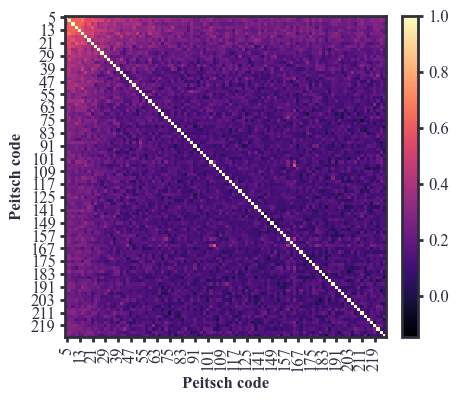

In [22]:
PATH: str = "redundancy/90_percent_redundancy"

plot.rcParams.update({
    "font.size": 12,
    "font.family": "Times New Roman",
    "text.color": BLACKBLUE,
    "axes.labelcolor": BLACKBLUE,
    "axes.edgecolor": BLACKBLUE,
    "xtick.color": BLACKBLUE,
    "ytick.color": BLACKBLUE,
    "axes.linewidth": 2,
    "xtick.major.width": 2,
    "xtick.minor.width": 2,
    "ytick.major.width": 2,
    "ytick.minor.width": 2
})

figure = plot.figure(
    figsize=(300 / PT_TO_INCH, 300 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=1,
    ncols=1,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

# MAX_COSINE_SIZE: int = 300
# N: int = int(MAX_COSINE_SIZE / 20)
# min_val: float = 1

command: str = "ls ../../../data/peitsch2vec/" + PATH

MAX_COSINE_SIZE: int = 100
N: int = int(MAX_COSINE_SIZE / 23)

# Get data.
cosine: object = np.load(
    popen(command + "/matrix_cosine_2023*.npy").readlines()[0].strip(),
    allow_pickle=True
)

# Get data.
common_peitsch: object = np.transpose(np.load(
    popen(command + "/characteristics*.npy").readlines()[0].strip(),
    allow_pickle=True
))[0].astype("int64")

filter: np.ndarray = np.argsort(common_peitsch)

cosine[cosine >= 1.0] = 1.0
min_val: float = cosine.min()

cosine = cosine[:MAX_COSINE_SIZE, :MAX_COSINE_SIZE]
common_peitsch = common_peitsch[filter]

print(cosine.shape)
nitem = 46
print(cosine[nitem:, nitem:].shape)
print(list(cosine[46:, 46:][1:, 0]))
print(cosine[46:, 46:][1:, 0].max())
print(cosine[46:, 46:][0, 25])
print(cosine[46, 46 + 25])

print(common_peitsch[46])
print(common_peitsch[46 + 25])

cor_plot = to_plot.imshow(
    cosine,
    cmap="magma",
    vmin=min_val,
    vmax=1
)

pos: np.ndarray = np.array(list(range(MAX_COSINE_SIZE)))
tick: np.ndarray = common_peitsch[:MAX_COSINE_SIZE][pos % N == 0]

to_plot.set_xticks(pos[pos % N == 0])
to_plot.set_xticklabels(tick, rotation=90)

to_plot.set_xlabel(
    xlabel="Peitsch code",
    fontweight="bold"
)

to_plot.set_yticks(pos[pos % N == 0])
to_plot.set_yticklabels(tick)

to_plot.set_ylabel(
    ylabel="Peitsch code",
    fontweight="bold"
)

axins = inset_axes(
    to_plot,
    width="5%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0, 1, 1),
    bbox_transform=to_plot.transAxes,
    borderpad=0,
)

figure.colorbar(cor_plot, cax=axins)

plot.savefig(
    "../../../data/output_plot/90_RL_cosine_distance_matrix.pdf",
    bbox_inches="tight"
)


Parsing path:   0%|          | 0/4 [00:00<?, ?it/s]

[VIOLIN PLOTTING]
[BOX PLOTTING]


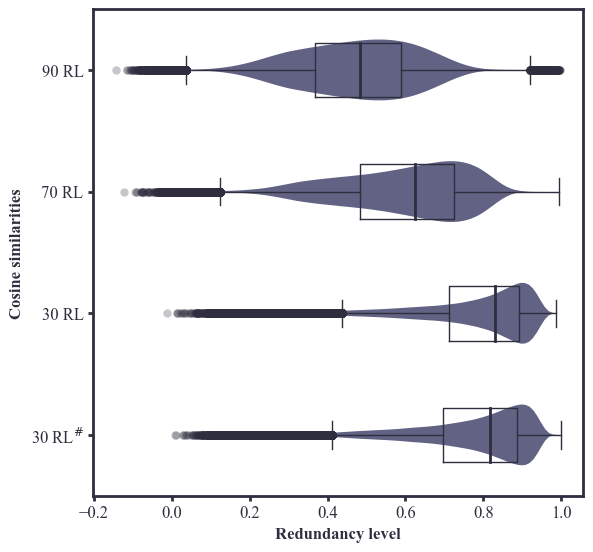

In [23]:
figure = plot.figure(
    figsize=(455 / PT_TO_INCH, 455 / PT_TO_INCH)
)

grid = figure.add_gridspec(
    nrows=1,
    ncols=1,
    hspace=0,
    wspace=0
)

to_plot = grid.subplots(
    sharex=True,
    sharey=True
)

PATH: list = [
    "../default_domain/",
    "30_percent_redundancy/",
    "70_percent_redundancy/",
    "90_percent_redundancy/"
]

LABELS: list = [
    "30 RL$^\#$",
    "30 RL",
    "70 RL",
    "90 RL"
]

data: list = []

for path_i in tqdm(PATH, "Parsing path"):
    command: str = "ls ../../../data/peitsch2vec/redundancy/" + path_i

    # Get data.
    cosine: object = np.load(
        popen(command + "/matrix_cosine_2023*.npy").readlines()[0].strip(),
        allow_pickle=True
    )

    data += [cosine[np.triu_indices(cosine.shape[0], k=1)]]

violin_plot = to_plot.violinplot(
    data,
    vert=False,
    showmeans=False,
    showextrema=False,
    showmedians=False
)

print("[VIOLIN PLOTTING]")

box_plot = to_plot.boxplot(
    data,
    vert=False,
    labels=LABELS,
    meanline=True
)

print("[BOX PLOTTING]")

for patch in violin_plot["bodies"]:
    patch.set_facecolor(LIGHTBLACKBLUE)
    patch.set_alpha(1)

to_plot.set_xlabel(
    xlabel="Redundancy level",
    fontweight="bold"
)

to_plot.set_ylabel(
    ylabel="Cosine similarities",
    fontweight="bold"
)

plot.savefig(
    ("../../../data/output_plot/"
     "cosine_90_RL_distribution.pdf"),
    bbox_inches="tight"
)
